In [78]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt

from numpy.linalg import eig, inv

import warnings
warnings.filterwarnings("ignore")

In [79]:
dict = {'X1': [1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 6],
       'X2': [2, 3, 3, 5, 5, 0, 1, 1, 2, 3, 5],
       'C': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]}
data = pa.DataFrame(data=dict)

In [80]:
X = data[['X1', 'X2']]

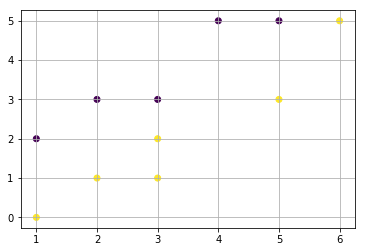

In [81]:
plt.grid()
plt.scatter(data.X1, data.X2, c=data.C)

### Avec une ACP :

In [82]:
Z = X - X.mean()
S = len(X) * X.cov()
lambdas, vect = eig(S)
print(lambdas)
print(vect)

[ 6.9605153 56.6394847]
[[-0.72676058 -0.68689087]
 [ 0.68689087 -0.72676058]]


In [83]:
v = vect[:,1]
print(v)

[-0.68689087 -0.72676058]


In [84]:
Y = np.dot(v.T, Z.T)

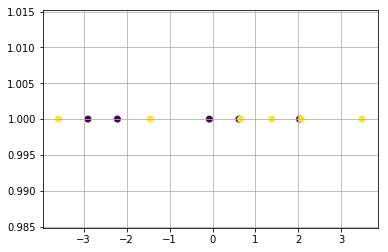

In [85]:
plt.grid()
plt.scatter(Y, np.ones(len(Y)), c=data.C)

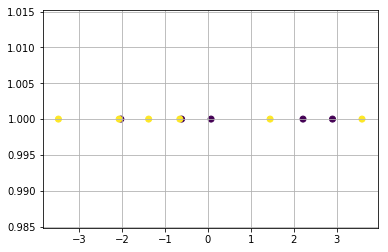

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_acp = pca.fit(X).transform(X)
plt.grid()
plt.scatter(X_acp, np.ones(len(X_acp)), c=data.C)

#### Pas top top pour la séparation des classes ...

### Avec une LDA :

In [87]:
#On calcule les moyennes :
mu1 = np.mean(data[['X1', 'X2']][data.C==1])
mu2 = np.mean(data[['X1', 'X2']][data.C==2])
print(mu1)
print(mu2)

X1    3.0
X2    3.6
dtype: float64
X1    3.333333
X2    2.000000
dtype: float64


In [88]:
#On calcule les matrices de dispersion (scatter matrices)
S1 = (len(X[data.C==1]) - 1) * X[data.C==1].cov()
S2 = (len(X[data.C==2]) - 1) * X[data.C==2].cov()
print(S1)
print(S2)

      X1   X2
X1  10.0  8.0
X2   8.0  7.2
           X1    X2
X1  17.333333  16.0
X2  16.000000  16.0


In [89]:
#dispersion intra-classes :
Sw = S1 + S2
print(Sw)

           X1    X2
X1  27.333333  24.0
X2  24.000000  23.2


In [90]:
#Inverse de la matrice Sw :
invSw = inv(Sw)
print(invSw)

[[ 0.39908257 -0.41284404]
 [-0.41284404  0.47018349]]


In [91]:
#Vecteur de la meilleur direction :
v = np.matmul(invSw, mu1 - mu2)
print(v)

X1   -0.793578
X2    0.889908
dtype: float64


In [92]:
#Et on projette les données :
#print(v)
#print(X.T)
y = np.dot(v.T, X.T)
print(y)

[ 0.98623853  1.08256881  0.28899083  1.27522936  0.48165138 -0.79357798
 -0.69724771 -1.49082569 -0.60091743 -1.29816514 -0.31192661]


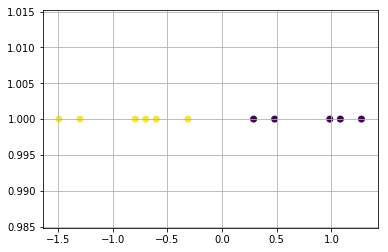

In [93]:
#Et on projette :
plt.grid()
plt.scatter(y, np.ones(len(y)), c=data.C)

yyyoooouuuuuupppppppiiiii :-)

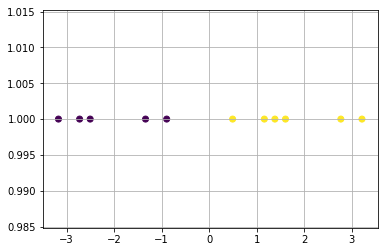

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, data.C).transform(X)
plt.grid()
plt.scatter(X_lda, np.ones(len(X_lda)), c=data.C)